##### Target variable -> SalePrice

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### PCA - Used to reduce dimensions - Unsupervised learning
<pre>
1) Standardize the dataset.
2) Compute Covaraince Matrix from the Standardized dataset.
3) Compute Eigen values and eigen vectors from the Covaraince Matrix. 
Arrange Eigen Vectors in decreasing order of Eigen values.
4) Select Feature matrix which is min number of eigen vectors required to generate the principal components.
5) Generate Principal Components from the Feature matrix.
PCs = np.dot(std_org_dataset,Eig_vect.T)
</pre>

In [83]:
df=pd.read_csv("D:\Data Analyst 2\PGA45\Python\ML\ML On Un-Supervised Learning\PCA 3\Project\houseprice.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
df.shape

(1460, 81)

In [85]:
len(df)

1460

In [86]:
def null_val_count(data):
    a=data.isnull().sum()
    a1=a[a>0]
    df_a1=pd.DataFrame(a1).reset_index()
    df_a1.rename(columns={"index":"Feature",0:"Null_Count"}, inplace=True)
    df_a1["Null_Per"]=round((df_a1["Null_Count"]/len(data))*100,1)
    df_a1.sort_values("Null_Per", ascending=False, inplace=True)
    return df_a1

In [87]:
null_val_count(df)

,Feature,Null_Count,Null_Per
16,PoolQC,1453,99.5
18,MiscFeature,1406,96.3
1,Alley,1369,93.8
17,Fence,1179,80.8
2,MasVnrType,872,59.7
10,FireplaceQu,690,47.3
0,LotFrontage,259,17.7
11,GarageType,81,5.5
12,GarageYrBlt,81,5.5
13,GarageFinish,81,5.5


In [88]:
almost_null_value_col=["PoolQC","MiscFeature","Alley","Fence"]

In [89]:
df.drop(almost_null_value_col, axis=1, inplace=True)

In [90]:
df["BsmtFinType2"].fillna("Unf", inplace=True)

In [91]:
df["BsmtExposure"].fillna("No", inplace=True)

In [92]:
df["BsmtFinType1"].fillna("No Basement", inplace=True)

In [93]:
df["BsmtCond"].fillna("TA", inplace=True)

In [94]:
df["BsmtQual"].fillna("No Basement", inplace=True)

In [95]:
df["GarageType"].fillna("Attchd", inplace=True)

We will treat this column in the end becoz it's date column "GarageYrBlt".

In [96]:
df["GarageFinish"].fillna("No Garage", inplace=True)

In [97]:
df["GarageQual"].fillna("TA", inplace=True)

In [98]:
df["GarageCond"].fillna("TA", inplace=True)

In [99]:
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)

In [100]:
df["FireplaceQu"].fillna("No Fireplace", inplace=True)

In [101]:
df["MasVnrType"].fillna("Other", inplace=True)

In [102]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)

In [103]:
df.dropna(inplace=True)

In [104]:
null_val_count(df)

,Feature,Null_Count,Null_Per


In [105]:
df.duplicated().sum()

0

In [106]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [107]:
df.drop(["Id"], axis=1, inplace=True)

In [108]:
class_=df.dtypes
class_df=pd.DataFrame(class_).reset_index()
class_df.rename(columns={"index":"Feature",0:"Dtype"}, inplace=True)

In [109]:
class_df.iloc[39:]

,Feature,Dtype
39,CentralAir,object
40,Electrical,object
41,1stFlrSF,int64
42,2ndFlrSF,int64
43,LowQualFinSF,int64
44,GrLivArea,int64
45,BsmtFullBath,int64
46,BsmtHalfBath,int64
47,FullBath,int64
48,HalfBath,int64


In [110]:
df.iloc[:,40:60].head()

,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars
0,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2
1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2
2,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2
3,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3
4,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3


In [111]:
df["GarageYrBlt"]=pd.to_numeric(df["GarageYrBlt"])

##### EDA

In [112]:
cat_cols=df.select_dtypes(include="object").columns
num_cols=df.dtypes[df.dtypes!="object"].index

In [113]:
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [114]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

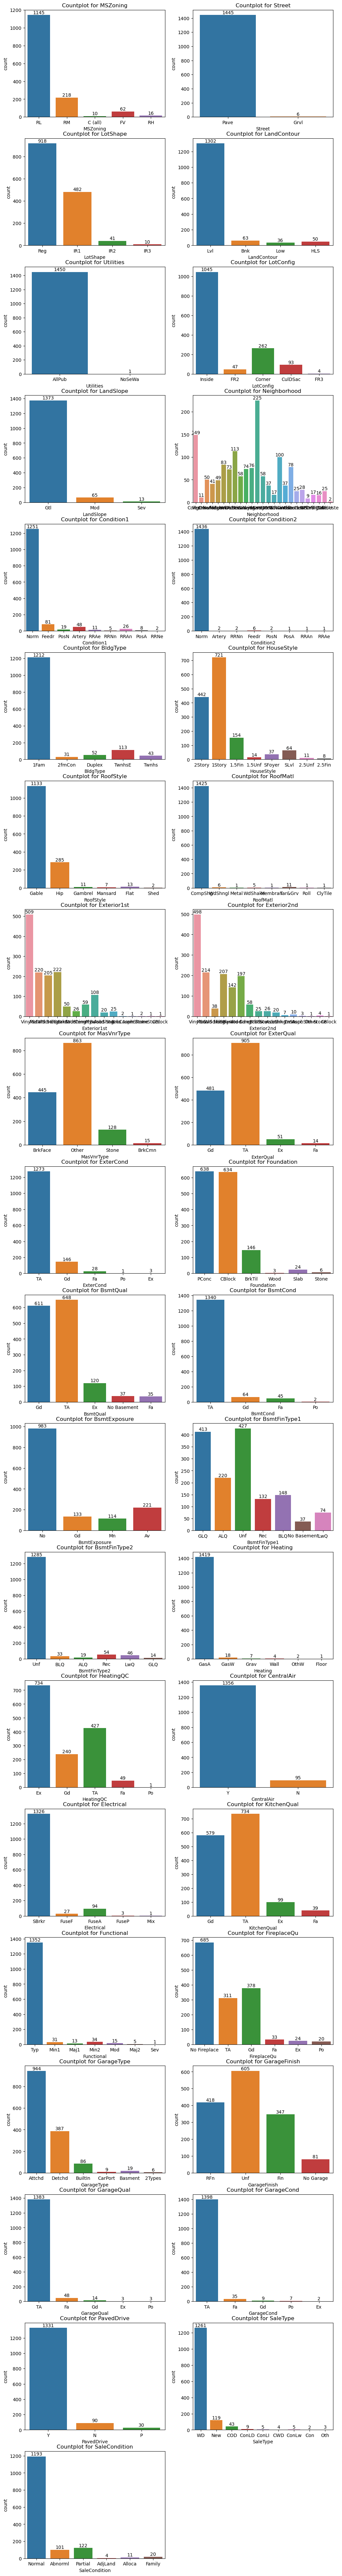

In [115]:
plt.figure(figsize=(12,100))
for i in range(len(cat_cols)):
    plt.subplot(20,2,i+1)
    ax=sns.countplot(x=df[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f"Countplot for {cat_cols[i]}")
plt.show()

Inference:-
Street, Utilities, LandSlope, Condition2, RoofMatl, Heating, GarageQual, GarageCond

##### Drop Buyers Columns

In [116]:
cat_buyer_cols=["Street", "Utilities", "LandSlope", "Condition2", "RoofMatl", "Heating", "GarageQual", "GarageCond"]

In [117]:
df.drop(cat_buyer_cols, axis=1, inplace=True)

I didn't take target variable.

In [118]:
num_cols1=num_cols[:-1]

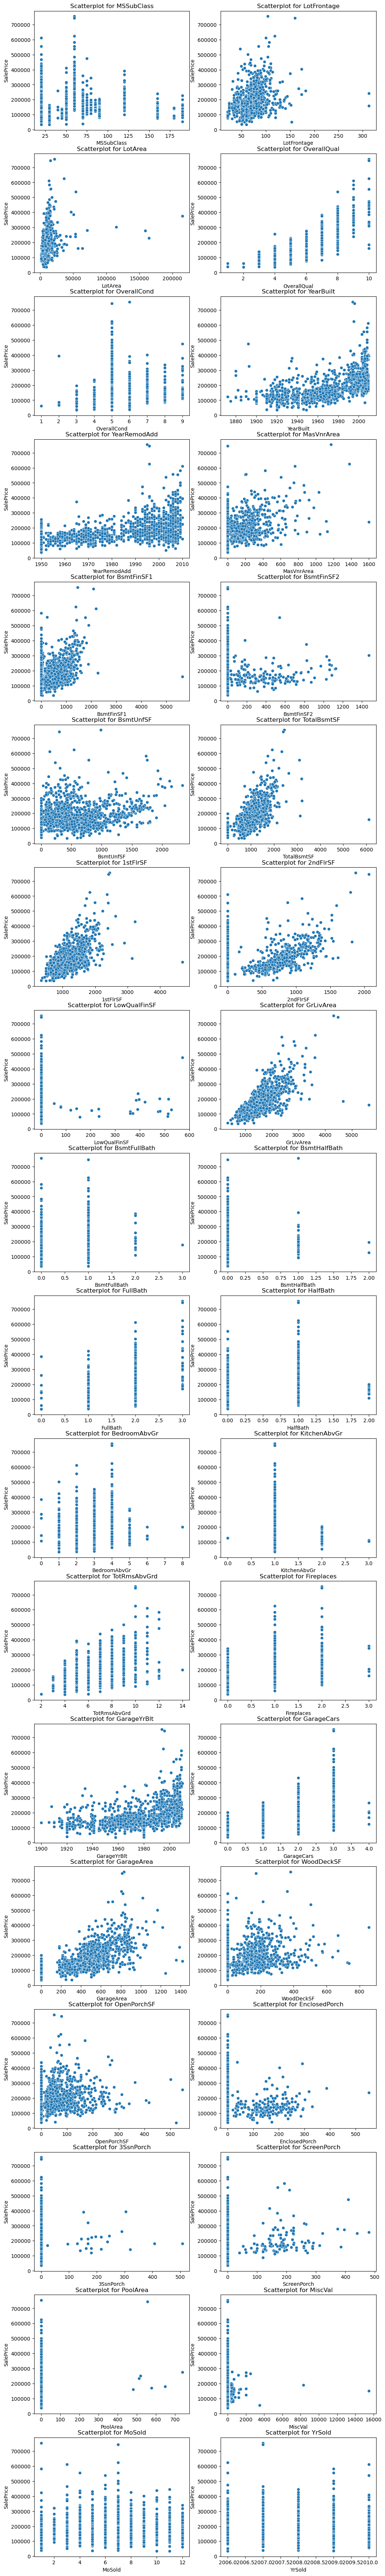

In [119]:
plt.figure(figsize=(12,90))
for i in range(len(num_cols1)):
    plt.subplot(18,2,i+1)
    sns.scatterplot(x=df[num_cols1[i]], y=df["SalePrice"])
    plt.title(f"Scatterplot for {num_cols1[i]}")
plt.show()

In [120]:
num_buyer_cols=["LowQualFinSF", "3SsnPorch", "PoolArea", "MiscVal"]

In [121]:
df.drop(num_buyer_cols, axis=1, inplace=True)

In [122]:
cat_cols1=df.select_dtypes(include="object").columns
num_cols2=df.dtypes[df.dtypes!="object"].index

In [123]:
cat_cols1

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [124]:
num_cols2

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [125]:
df.shape

(1451, 64)

In [126]:
print(sns.__version__)

0.12.2


In [ ]:
# !pip install seaborn==0.13.2 if want to upadate seaborn

In [127]:
cor=df[num_cols2].corr()

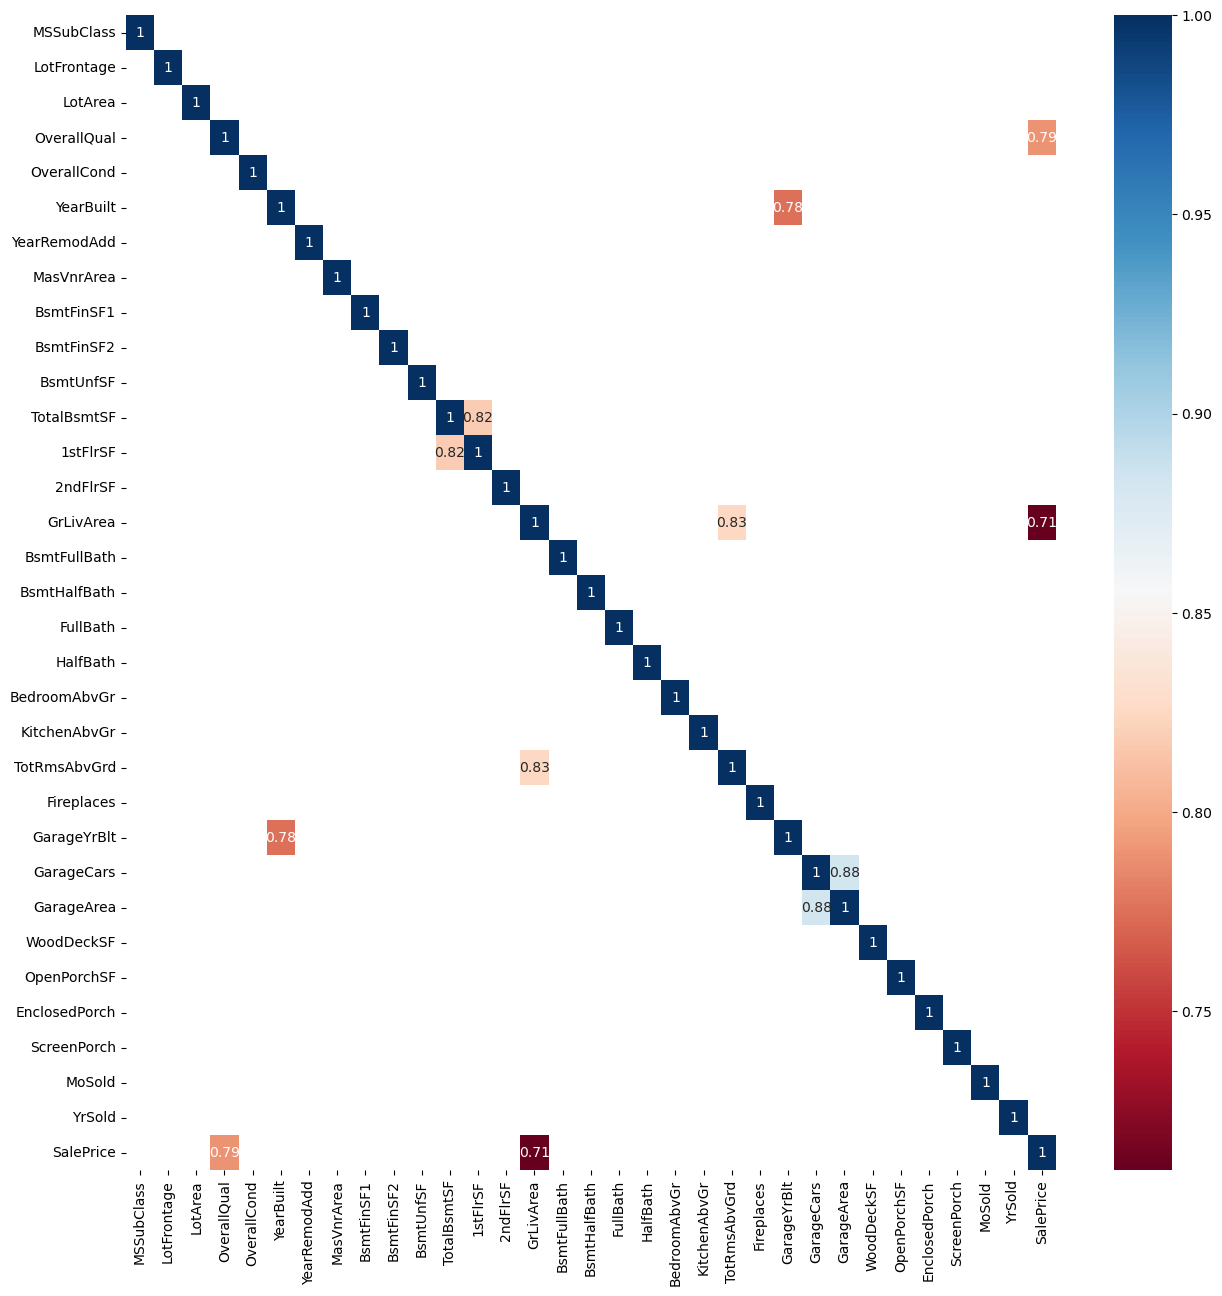

In [128]:
plt.figure(figsize=(15,15))
sns.heatmap(cor[cor>0.7], annot=True, cmap="RdBu")
plt.show()

When we are applying PCA, so we don't need to drop high correlated features, because work of PCA reduce unwanted features.

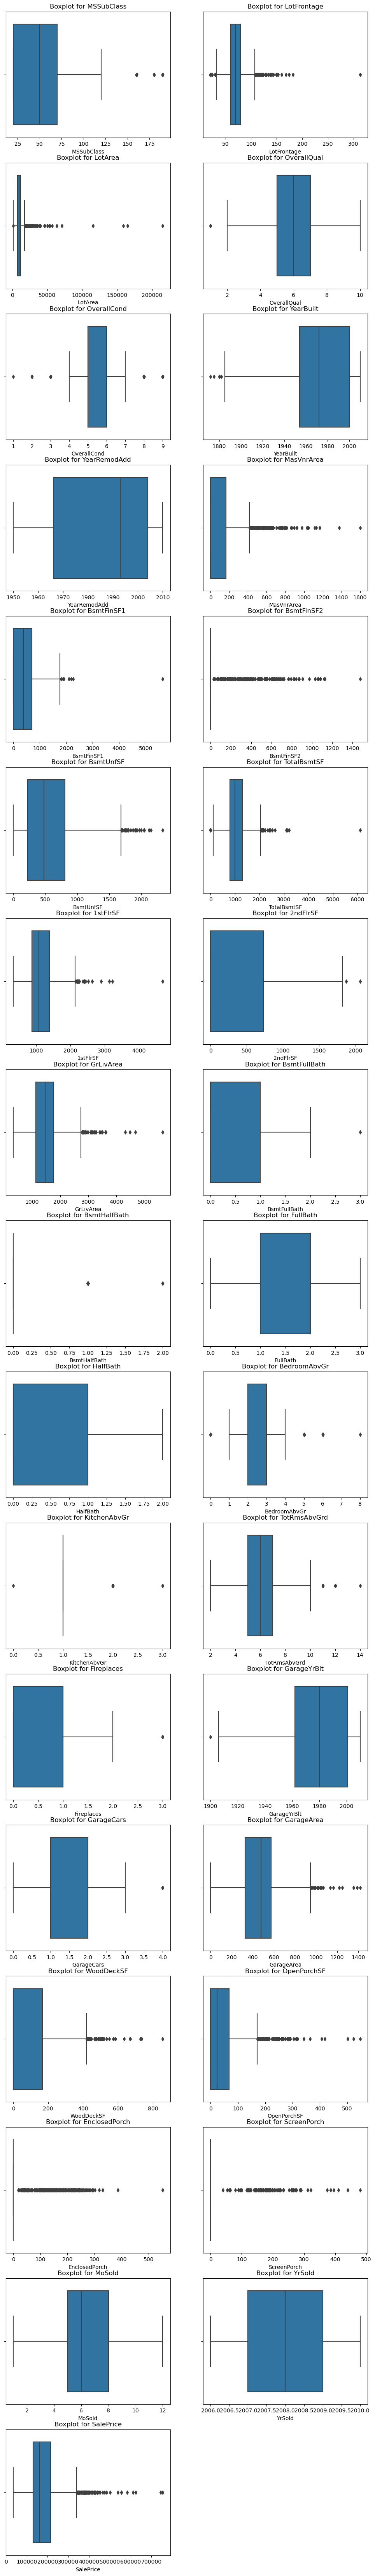

In [129]:
plt.figure(figsize=(12,85))
for i in range(len(num_cols2)):
    plt.subplot(17,2,i+1)
    sns.boxplot(x=df[num_cols2[i]])
    plt.title(f"Boxplot for {num_cols2[i]}")
plt.show()

In [130]:
df[num_cols2].describe(percentiles=[0.01,0.02,0.03,0.04,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,50%,60%,70%,80%,90%,95%,96%,97%,98%,99%,max
MSSubClass,1451.0,56.933150,42.350366,20.0,20.0,20.0,20.0,20.0,50.0,60.0,60.0,80.0,120.0,160.0,160.0,160.0,190.0,190.0,190.0
LotFrontage,1451.0,69.845624,22.044429,21.0,21.0,24.0,30.0,34.0,69.0,70.0,75.0,80.0,92.0,104.0,107.0,114.0,121.0,137.5,313.0
LotArea,1451.0,10507.808408,9992.987081,1300.0,1680.0,2117.0,2522.0,3072.0,9477.0,10200.0,11065.0,12205.0,14375.0,17308.5,18800.0,21494.0,25095.0,37802.0,215245.0
OverallQual,1451.0,6.093728,1.381467,1.0,3.0,4.0,4.0,4.0,6.0,6.0,7.0,7.0,8.0,8.0,9.0,9.0,9.0,10.0,10.0
OverallCond,1451.0,5.579600,1.113415,1.0,3.0,3.0,4.0,4.0,5.0,5.0,6.0,7.0,7.0,8.0,8.0,8.0,8.0,9.0,9.0
YearBuilt,1451.0,1971.092350,30.190266,1872.0,1899.0,1908.0,1910.0,1914.0,1972.0,1983.0,1997.0,2003.0,2006.0,2007.0,2007.0,2007.0,2008.0,2009.0,2010.0
YearRemodAdd,1451.0,1984.760165,20.651334,1950.0,1950.0,1950.0,1950.0,1950.0,1993.0,1998.0,2002.0,2005.0,2006.0,2007.0,2008.0,2008.0,2008.0,2009.0,2010.0
MasVnrArea,1451.0,103.756720,181.108150,0.0,0.0,0.0,0.0,0.0,0.0,16.0,117.0,206.0,335.0,456.0,491.0,574.5,651.0,792.0,1600.0
BsmtFinSF1,1451.0,442.274983,455.369276,0.0,0.0,0.0,0.0,0.0,381.0,523.0,651.0,795.0,1064.0,1272.0,1309.0,1371.0,1443.0,1572.5,5644.0
BsmtFinSF2,1451.0,46.838043,161.777324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,398.0,480.0,546.5,661.0,832.0,1474.0


In [131]:
left_side_outlier=["1stFlrSF","GrLivArea", "SalePrice"]

In [132]:
for i in left_side_outlier:
    lower=df[i].quantile(0.01)
    df[i]=np.where(df[i]<lower, lower, df[i])

In [133]:
right_side_outlier=["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
                   "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
                   "ScreenPorch", "SalePrice"]

In [134]:
for i in right_side_outlier:
    upper=df[i].quantile(0.99)
    df[i]=np.where(df[i]>upper, upper, df[i])

In [135]:
df[num_cols2].describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,60%,70%,80%,90%,95%,96%,97%,98%,99%,max
MSSubClass,1451.0,56.933150,42.350366,20.0,20.00,20.0,20.0,20.0,20.0,50.0,60.0,60.0,80.0,120.0,160.0,160.0,160.0,190.0,190.00,190.0
LotFrontage,1451.0,69.440041,19.586902,21.0,21.00,24.0,30.0,34.0,36.0,69.0,70.0,75.0,80.0,92.0,104.0,107.0,114.0,121.0,137.25,137.5
LotArea,1451.0,10052.696072,5053.852966,1300.0,1680.00,2117.0,2522.0,3072.0,3273.0,9477.0,10200.0,11065.0,12205.0,14375.0,17308.5,18800.0,21494.0,25095.0,37151.00,37802.0
OverallQual,1451.0,6.093728,1.381467,1.0,3.00,4.0,4.0,4.0,4.0,6.0,6.0,7.0,7.0,8.0,8.0,9.0,9.0,9.0,10.00,10.0
OverallCond,1451.0,5.579600,1.113415,1.0,3.00,3.0,4.0,4.0,4.0,5.0,5.0,6.0,7.0,7.0,8.0,8.0,8.0,8.0,9.00,9.0
YearBuilt,1451.0,1971.092350,30.190266,1872.0,1899.00,1908.0,1910.0,1914.0,1916.0,1972.0,1983.0,1997.0,2003.0,2006.0,2007.0,2007.0,2007.0,2008.0,2009.00,2010.0
YearRemodAdd,1451.0,1984.760165,20.651334,1950.0,1950.00,1950.0,1950.0,1950.0,1950.0,1993.0,1998.0,2002.0,2005.0,2006.0,2007.0,2008.0,2008.0,2008.0,2009.00,2010.0
MasVnrArea,1451.0,101.245348,168.087097,0.0,0.00,0.0,0.0,0.0,0.0,0.0,16.0,117.0,206.0,335.0,456.0,491.0,574.5,651.0,790.00,792.0
BsmtFinSF1,1451.0,437.134735,428.086708,0.0,0.00,0.0,0.0,0.0,0.0,381.0,523.0,651.0,795.0,1064.0,1272.0,1309.0,1371.0,1443.0,1572.25,1572.5
BsmtFinSF2,1451.0,44.696761,148.771986,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,398.0,480.0,546.5,661.0,827.50,832.0


In [136]:
from sklearn.preprocessing import OrdinalEncoder

OrdinalEncoder use for when we have large categories data, LabelEncoder use for like good,bad etc.

In [137]:
Oe=OrdinalEncoder()

In [138]:
for i in cat_cols1:
    df[i]=Oe.fit_transform(df[[i]])

In [139]:
x=df.drop("SalePrice", axis=1)

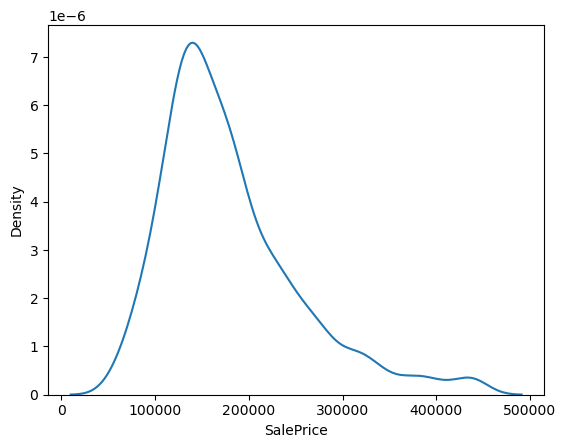

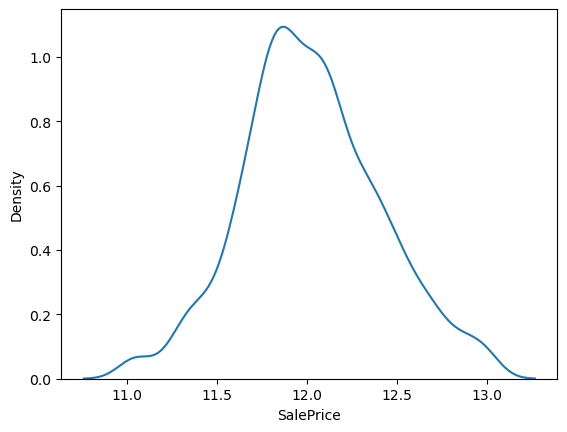

In [140]:
sns.kdeplot(x=df["SalePrice"])
plt.show()
sns.kdeplot(x=np.log(df["SalePrice"]))
plt.show()

In [141]:
from scipy.stats import boxcox

In [142]:
transform_data,best_lamb=boxcox(df["SalePrice"])

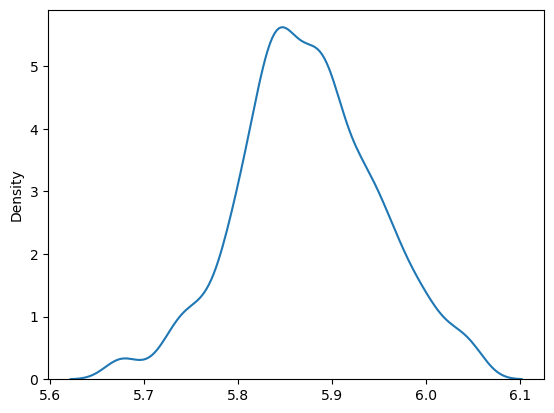

In [143]:
sns.kdeplot(x=transform_data)
plt.show()

In [144]:
y=np.log(df["SalePrice"])

##### LinearModel apply before PCA

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=42)

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [148]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [149]:
y_pred=lr.predict(x_test)

In [150]:
lr.score(x_train,y_train)

0.9149329341295598

In [151]:
lr.score(x_test,y_test)

0.8721522444423254

In [152]:
mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
mse=mean_squared_error(np.exp(y_test),np.exp(y_pred))
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"MAE = {mae}, MSE = {mse}, RMSE = {rmse}, R2 = {r2}")

MAE = 15409.882563450095, MSE = 910445971.7062718, RMSE = 30173.59726161718, R2 = 0.8721522444423254


##### PCA

In [153]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [154]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [155]:
pca=PCA()
pc_train=pca.fit_transform(x_train_sc)
pc_test=pca.transform(x_test_sc)

In [156]:
eig_val=pca.explained_variance_
eig_vec=pca.components_

In [157]:
total=sum(eig_val)

In [158]:
eig_data_df=pd.DataFrame({"Eig_Val":eig_val})
eig_data_df["Per_Eig_Val"]=[(i/total)*100 for i in eig_val]
eig_data_df["Cum_Sum_Eig_Val"]=np.cumsum(eig_data_df["Per_Eig_Val"])
eig_data_df.head()

,Eig_Val,Per_Eig_Val,Cum_Sum_Eig_Val
0,10.228269,16.219351,16.219351
1,3.999563,6.342257,22.561609
2,3.557191,5.640772,28.202380
3,3.053315,4.841756,33.044137
4,2.301171,3.649054,36.693191


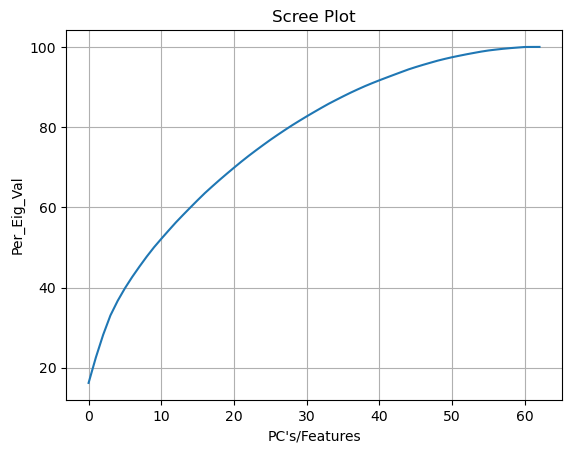

In [159]:
plt.plot(range(63), eig_data_df["Cum_Sum_Eig_Val"])
plt.title("Scree Plot")
plt.xlabel("PC's/Features")
plt.ylabel("Per_Eig_Val")
plt.grid()
plt.show()

Now, we will choose percent of data, which you will select. like in this scenario, i m choosing 80% data & i m tolrating 20% data. Atleast we has to choose 75% & above then 75%.

Now we has to find index of that feature which is start above from 80% in Cum_Sum_Eig_Val.<br>
we will take all the columns which Cum_Sum_Eig_Val is less than 80%. Because we have decided that we will take 80% & tolrate 20% data, that'swhy we will all the columns which Cum_Sum_Eig_Val is less than 80%. If we will take all the columns which Cum_Sum_Eig_Val is above from 80%, so it means we are taking only 20% data & we are tolrating 80% data. 

Index is showing the no.of features.

In [160]:
eig_data_df[eig_data_df["Cum_Sum_Eig_Val"]>80] 

,Eig_Val,Per_Eig_Val,Cum_Sum_Eig_Val
28,0.743053,1.178287,80.476795
29,0.707649,1.122146,81.598941
30,0.691330,1.096268,82.695209
31,0.668906,1.060709,83.755919
32,0.657698,1.042937,84.798855
33,0.639905,1.014722,85.813577
34,0.593105,0.940509,86.754086
35,0.581108,0.921486,87.675571
36,0.563008,0.892783,88.568354
37,0.531771,0.843249,89.411603


Inference :- <br>
Retaining 28 PC's, ensure that 80% informaton is retained.

In [163]:
pc_=[f"PC{i}" for i in range(63)]

In [164]:
pc_train_df=pd.DataFrame(pc_train, columns=pc_)
pc_test_df=pd.DataFrame(pc_test, columns=pc_)

In [168]:
print(pc_train_df.shape)
print(pc_test_df.shape)

(1015, 63)
(436, 63)


In [169]:
final_pc_train_df=pc_train_df.iloc[:,:28]
final_pc_test_df=pc_test_df.iloc[:,:28]

In [170]:
print(final_pc_train_df.shape)
print(final_pc_test_df.shape)

(1015, 28)
(436, 28)


##### LinearModel apply after PCA

In [173]:
lr1=LinearRegression()
lr1.fit(final_pc_train_df,y_train)

LinearRegression()

In [174]:
y_pred_1=lr1.predict(final_pc_test_df)

In [175]:
mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred_1))
mse=mean_squared_error(np.exp(y_test),np.exp(y_pred_1))
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_1)
print(f"MAE = {mae}, MSE = {mse}, RMSE = {rmse}, R2 = {r2}")

MAE = 16712.91718107403, MSE = 1042159428.3953241, RMSE = 32282.49414768512, R2 = 0.8634336714185653


In [176]:
lr1.score(final_pc_train_df,y_train)

0.8917986659154367

In [177]:
lr1.score(final_pc_test_df,y_test)

0.8634336714185653